In [67]:
# Initial imports
import os
import requests
import pandas as pd
import numpy as np
import seaborn as sns
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [68]:
# Load .env enviroment variables
load_dotenv()

True

In [69]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2"
)

In [70]:
# Format current date as ISO format
start_date = pd.Timestamp("2016-05-27", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2021-05-27", tz="America/New_York").isoformat()

# Set the tickers
tickers =["TSLA", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
spy_tsla_price_df = api.get_barset(
    tickers,
    timeframe,
    start = start_date,
    end = end_date,
    limit = 1000
).df


In [71]:
# Display DataFrame
spy_tsla_price_df

SPY                                       \
                             open    high       low   close     volume   
time                                                                     
2017-06-08 00:00:00-04:00  243.77  244.33  243.1700  243.76   48051333   
2017-06-09 00:00:00-04:00  244.09  245.01  241.9500  243.45  103578275   
2017-06-12 00:00:00-04:00  243.14  243.42  242.3800  243.34   57096569   
2017-06-13 00:00:00-04:00  243.99  244.61  243.5799  244.52   43470532   
2017-06-14 00:00:00-04:00  244.86  244.87  243.2900  244.26   55098826   
...                           ...     ...       ...     ...        ...   
2021-05-21 00:00:00-04:00  416.87  418.20  414.4500  414.95   66393170   
2021-05-24 00:00:00-04:00  417.34  420.32  417.0800  419.12   45499764   
2021-05-25 00:00:00-04:00  420.33  420.71  417.6200  418.25   50977513   
2021-05-26 00:00:00-04:00  418.87  419.61  417.7600  419.04   38369865   
2021-05-27 00:00:00-04:00  420.17  420.72  418.9851  419.69   48411613   

                              TSLA                                      
                              open    high     low     close    volume  
time                                                                    
2017-06-08 00:00:00-04:00  363.750  371.90  360.22  370.0100   7489685  
2017-06-09 00:00:00-04:00  374.420  376.87  354.80  357.4500  14323526  
2017-06-12 00:00:00-04:00  357.990  364.50  350.62  358.9900   8528936  
2017-06-13 00:00:00-04:00  367.670  376.00  366.61  375.9500   9720070  
2017-06-14 00:00:00-04:00  381.085  384.25  376.31  380.6599  10303555  
...                            ...     ...     ...       ...       ...  
2021-05-21 00:00:00-04:00  595.780  596.68  580.00  580.8900  24381522  
2021-05-24 00:00:00-04:00  581.450  614.48  573.65  606.8700  32962349  
2021-05-25 00:00:00-04:00  607.450  613.99  595.71  604.7000  26785700  
2021-05-26 00:00:00-04:00  607.390  626.17  601.50  619.1900  27563527  
2021-05-27 00:00:00-04:00  620.240  630.77  616.21  630.6000  22789393  

[1000 rows x 10 columns]

In [72]:
# Create new dataframe to represent only Date, ticker, and closing prices
spy_tsla_closing_prices = pd.DataFrame()
spy_tsla_closing_prices["TSLA"] = spy_tsla_price_df["TSLA"]["close"]
spy_tsla_closing_prices["SPY"] = spy_tsla_price_df["SPY"]["close"]

In [73]:
# Set index to date
spy_tsla_closing_prices.index = spy_tsla_closing_prices.index.date

In [74]:
# Calculate Daily Returns
spy_tsla_returns = spy_tsla_closing_prices.pct_change().dropna()

<AxesSubplot:title={'center':'Cumulative Returns'}>

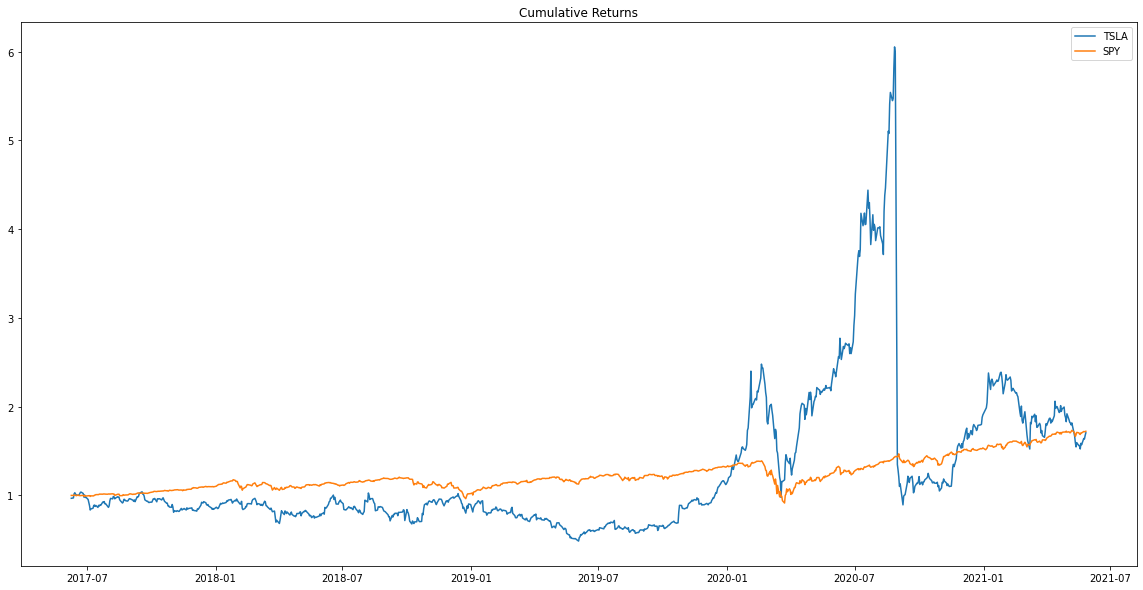

In [75]:
# Calculate Cumulative Returns
spy_tsla_cumulative_returns = (1 + spy_tsla_returns).cumprod()

# Plot Cummulative Returns
spy_tsla_cumulative_returns.plot(title = 'Cumulative Returns', figsize = (20,10) )

In [76]:
# Calculate Standard Deviation
spy_tsla_std = spy_tsla_returns.std()

# Calculate Annual Standard Deviation
spy_tsla_annual_std = spy_tsla_std *np.sqrt(252)

# Display Standard Deviation
spy_tsla_annual_std

TSLA    0.748898
SPY     0.208527
dtype: float64

In [77]:
# Calculate Correlation
spy_tsla_correlation = spy_tsla_returns.corr()
# Display Correlation
spy_tsla_correlation

,TSLA,SPY
TSLA,1.000000,0.377107
SPY,0.377107,1.000000


<AxesSubplot:>

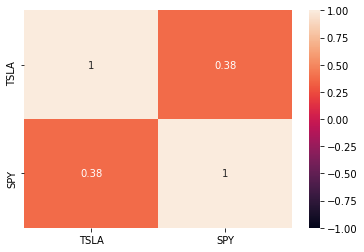

In [78]:
# Create Heatmap to show Correlation
sns.heatmap(spy_tsla_correlation, vmin = -1, vmax = 1, annot = True)

In [79]:
# Calculate Covariance
spy_tsla_covariance = spy_tsla_returns['SPY'].rolling(window = 60).cov(spy_tsla_returns['TSLA'])
# Display Covariance
spy_tsla_covariance

2017-06-09         NaN
2017-06-12         NaN
2017-06-13         NaN
2017-06-14         NaN
2017-06-15         NaN
                ...   
2021-05-21    0.000197
2021-05-24    0.000202
2021-05-25    0.000175
2021-05-26    0.000168
2021-05-27    0.000156
Length: 999, dtype: float64

In [80]:
#Calculate Variance
spy_tsla_variance = spy_tsla_returns['SPY'].rolling(window = 60).var()
# Display Variance
spy_tsla_variance

2017-06-09         NaN
2017-06-12         NaN
2017-06-13         NaN
2017-06-14         NaN
2017-06-15         NaN
                ...   
2021-05-21    0.000080
2021-05-24    0.000080
2021-05-25    0.000071
2021-05-26    0.000070
2021-05-27    0.000066
Name: SPY, Length: 999, dtype: float64

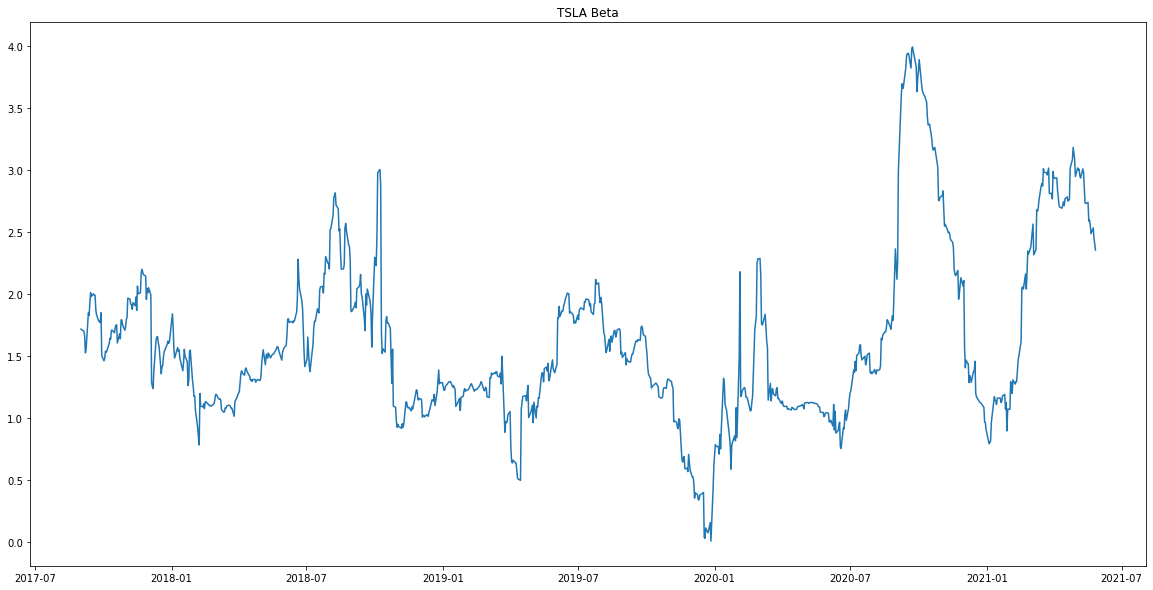

In [60]:
#Calculate Tesla's Beta
tsla_beta = spy_tsla_covariance / spy_tsla_variance
#Plot Tesla's Beta
tsla_beta_plot = tsla_beta.plot(title= "TSLA Beta", figsize=(20, 10))

In [62]:
# Calculate the Sharpe Ratio
spy_tsla_sharpe_ratio = (spy_tsla_returns.mean() * 252) / (spy_tsla_returns.std() * np.sqrt(252))
spy_tsla_sharpe_ratio

TSLA    0.692503
SPY     0.762361
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratio'}>

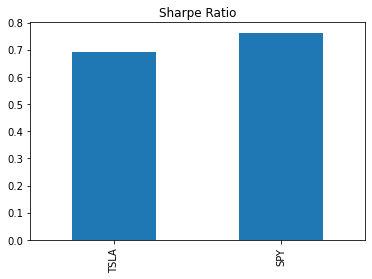

In [63]:
#Plot the Sharpe Ratio
spy_tsla_sharpe_ratio.plot(kind = "bar", title = "Sharpe Ratio")

In [82]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_five_year = MCSimulation(
    portfolio_data = spy_tsla_price_df,
    weights = [0,1],
    num_simulation = 500,
    num_trading_days = 252*5
)

In [83]:
# Printing the simulation input data
MC_five_year.portfolio_data.head()

SPY                                       \
                             open    high       low   close     volume   
time                                                                     
2017-06-08 00:00:00-04:00  243.77  244.33  243.1700  243.76   48051333   
2017-06-09 00:00:00-04:00  244.09  245.01  241.9500  243.45  103578275   
2017-06-12 00:00:00-04:00  243.14  243.42  242.3800  243.34   57096569   
2017-06-13 00:00:00-04:00  243.99  244.61  243.5799  244.52   43470532   
2017-06-14 00:00:00-04:00  244.86  244.87  243.2900  244.26   55098826   

                                           TSLA                            \
                          daily_return     open    high     low     close   
time                                                                        
2017-06-08 00:00:00-04:00          NaN  363.750  371.90  360.22  370.0100   
2017-06-09 00:00:00-04:00    -0.001272  374.420  376.87  354.80  357.4500   
2017-06-12 00:00:00-04:00    -0.000452  357.990  364.50  350.62  358.9900   
2017-06-13 00:00:00-04:00     0.004849  367.670  376.00  366.61  375.9500   
2017-06-14 00:00:00-04:00    -0.001063  381.085  384.25  376.31  380.6599   

                                                  
                             volume daily_return  
time                                              
2017-06-08 00:00:00-04:00   7489685          NaN  
2017-06-09 00:00:00-04:00  14323526    -0.033945  
2017-06-12 00:00:00-04:00   8528936     0.004308  
2017-06-13 00:00:00-04:00   9720070     0.047244  
2017-06-14 00:00:00-04:00  10303555     0.012528

In [84]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_five_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.946491,1.042324,0.942870,0.927684,0.954217,1.030324,1.083201,1.040894,1.035822,0.954816,...,0.981652,0.976072,0.956319,1.058129,1.145460,1.047969,1.067900,0.990904,0.916413,0.982339
2,0.903091,1.081138,0.902403,1.011226,0.919313,0.995027,1.117635,1.009332,1.085646,1.009570,...,1.007022,0.970364,0.959234,1.036519,1.181132,1.072787,1.075448,0.966257,0.887543,0.893597
3,0.892258,1.039354,0.808207,1.056371,0.947097,1.025389,1.170567,1.023129,1.129522,0.949957,...,0.991552,0.985930,0.991635,1.046253,1.133274,1.062925,1.151831,0.964010,0.874897,0.849022
4,0.887177,1.015221,0.816474,1.060545,0.921565,1.036934,1.085520,1.095424,1.157760,0.965841,...,1.023649,0.935383,0.997699,1.040089,1.150795,1.084260,1.246317,1.024567,0.802062,0.815614
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,0.184736,0.290382,11.859848,12.965057,6.275467,5.961258,0.346340,4.970785,1.402119,7.272178,...,1.270331,1.146698,5.946233,12.933736,1.522984,10.257098,3.346158,10.070878,3.513301,1.402475
1257,0.182164,0.334286,10.869542,13.189890,6.583352,6.488527,0.361618,5.307012,1.363884,7.395101,...,1.357465,1.084956,5.741083,12.895630,1.419678,10.180549,3.206154,10.862643,3.578978,1.363591
1258,0.182471,0.315127,10.964549,13.242567,7.082831,6.476053,0.372713,5.178316,1.401461,7.888682,...,1.388968,1.122281,5.845863,12.316090,1.426445,9.814790,3.316265,10.582945,3.305391,1.339317
1259,0.179843,0.320976,11.957345,12.991680,6.828813,6.512287,0.333053,5.527303,1.393092,7.649243,...,1.414565,1.078152,6.200463,12.574428,1.443961,9.531741,3.375018,11.229626,3.198822,1.398809


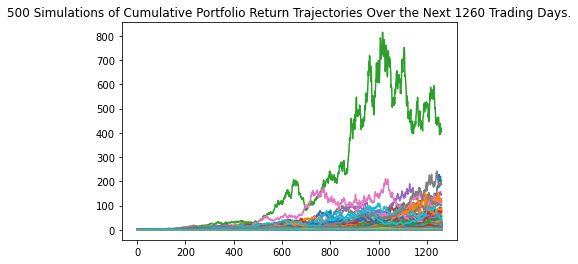

In [85]:
# Plot simulation outcomes
MC_plot = MC_five_year.plot_simulation()

In [87]:
# Fetch summary statistics from the Monte Carlo simulation results
MC_summary = MC_five_year.summarize_cumulative_return()

# Print summary statistics
print(MC_summary)

count           500.000000
mean             11.130300
std              28.289338
min               0.016090
25%               0.998944
50%               3.193627
75%               9.224370
max             415.291435
95% CI Lower      0.155979
95% CI Upper     77.532682
Name: 1260, dtype: float64
